In [1]:
import BoundaryLayerToolbox as blt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
#import scipy
import scipy.optimize as optimization
import scipy.interpolate as itp
#from netCDF4 import Dataset
#import os
import pandas as pd


#matplotlib
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime

import matplotlib.mlab as mlab

from scipy.stats import stats

In [2]:
mer = pd.read_csv('../datos/dataframes_VC/MER/vc_MER.csv', index_col = 0)

In [3]:
mer.index = pd.to_datetime(mer.index)

In [4]:
mer.head()

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,3.0,84.0,123.0
2015-01-01 02:00:00,NaN,NaN,NaN,2.0,79.0,113.0
2015-01-01 03:00:00,NaN,NaN,NaN,2.0,87.0,118.0
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#x = mer.between_time('8:00', '18:00').dropna(subset=['pblh', 'O3'])['pblh']
#y = mer.between_time('8:00', '18:00').dropna(subset=['pblh', 'O3'])['u_mean']


In [6]:
points = mer.between_time('8:00', '18:00').dropna(subset=['pblh', 'O3'])[['pblh', 'u_mean']].values
z = mer.between_time('8:00', '18:00').dropna(subset=['pblh', 'O3'])['O3']

In [7]:
xmin, xmax = mer['pblh'].min(), mer['pblh'].max()
ymin, ymax = mer['u_mean'].min(), mer['u_mean'].max()

In [8]:
ny, nx = 250,250
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)
VC_grid = xi*yi

In [9]:
zi = scipy.interpolate.griddata(points,z,(xi,yi), method='linear')

(-100, 4000)

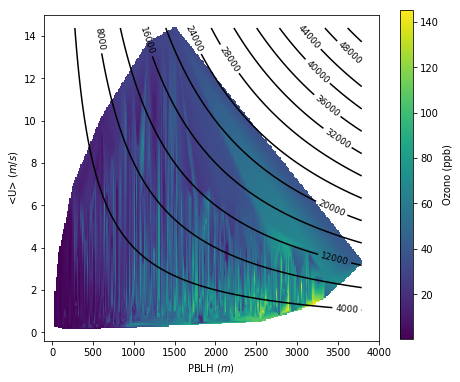

In [10]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

im = ax.pcolormesh(xi,yi,zi, cmap = 'viridis')
#ax.scatter(x,y, c = mer.between_time('8:00', '18:00')['O3'], 
#           s = mer.between_time('8:00', '18:00')['O3']*0.5, cmap ='viridis_r')

CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 100)


ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 15)
ax.set_xlim(-100, 4000)


In [67]:
#mer.loc[mer['PM10']> 75]
A = mer.rolling(24, min_periods = 21).mean()

In [68]:
A.loc[A['PM10']> 75]

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 23:00:00,NaN,NaN,NaN,20.727273,71.000000,98.333333
2015-01-02 00:00:00,NaN,NaN,NaN,19.913043,69.000000,96.181818
2015-01-02 01:00:00,NaN,NaN,NaN,19.869565,66.545455,92.772727
2015-01-02 02:00:00,NaN,NaN,NaN,19.869565,64.045455,89.454545
2015-01-02 03:00:00,NaN,NaN,NaN,19.869565,61.590909,86.545455
2015-01-02 04:00:00,NaN,NaN,NaN,19.125000,60.565217,85.347826
2015-01-02 05:00:00,NaN,NaN,NaN,19.083333,59.333333,83.666667
2015-01-02 06:00:00,NaN,NaN,NaN,19.041667,54.875000,78.291667
2015-01-13 01:00:00,NaN,NaN,NaN,29.875000,42.166667,75.458333
2015-01-13 02:00:00,NaN,NaN,NaN,29.208333,45.833333,80.333333


(-100, 4000)

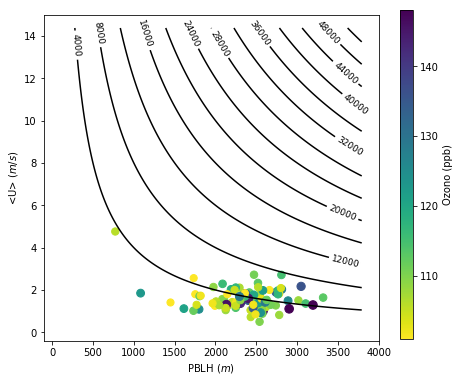

In [30]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

#im = ax.pcolormesh(xi,yi,zi, cmap = 'viridis')
im = ax.scatter(mer.loc[mer['O3']> 100]['pblh'], mer.loc[mer['O3']> 100]['u_mean'], c = mer.loc[mer['O3']> 100]['O3'], 
           s = mer.loc[mer['O3']> 100]['O3']*0.5, cmap ='viridis_r')

CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 100)


ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 15)
ax.set_xlim(-100, 4000)


(-100, 4000)

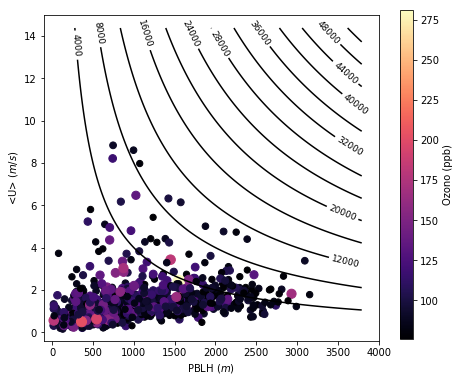

In [34]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

#im = ax.pcolormesh(xi,yi,zi, cmap = 'viridis')
im = ax.scatter(mer.loc[mer['PM10']> 75].between_time('8:00', '18:00')['pblh'], 
                mer.loc[mer['PM10']> 75].between_time('8:00', '18:00')['u_mean'], 
                c = mer.loc[mer['PM10']> 75].between_time('8:00', '18:00')['PM10'], 
           s = mer.loc[mer['PM10']> 75].between_time('8:00', '18:00')['PM10']*0.5, cmap ='magma')

CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 100)


ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 15)
ax.set_xlim(-100, 4000)


(-100, 4000)

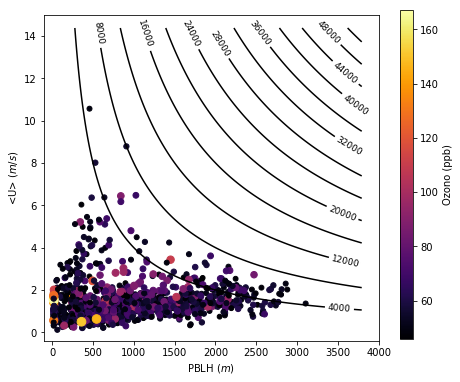

In [33]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

#im = ax.pcolormesh(xi,yi,zi, cmap = 'viridis')
im = ax.scatter(mer.loc[mer['PM2.5']> 45]['pblh'], 
                mer.loc[mer['PM2.5']> 45]['u_mean'], 
                c = mer.loc[mer['PM2.5']> 45]['PM2.5'], 
           s = mer.loc[mer['PM2.5']> 45]['PM2.5']*0.5, cmap ='inferno')

CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 100)


ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
ax.set_ylabel('<U> ($m/s$)')
cc.set_label('Ozono (ppb)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, 15)
ax.set_xlim(-100, 4000)


In [11]:
X = mer[['pblh', 'u_mean']].values

In [12]:
Y = mer['O3'].values

In [13]:
myint = itp.NearestNDInterpolator(X, Y)

In [14]:
ny, nx = 512,512
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)
VC_grid = xi*yi

In [15]:
Z = myint(xi, yi)

In [17]:
data = mer.dropna()
data.loc['O3_label'] = data['O3']

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
for i in range(0,160, 40):
    print(i, i+40)
    data['O3_label'][data.O3.between(i, i+40)] = i+40

0 40
40 80
80 120


/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


120 160


# K-nearest-neighbor

In [19]:
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = data[['pblh', 'u_mean']].values
y = data['O3_label'].values
h = .02

# Create color maps
#cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
#cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

ny, nx = 100,100
xi = np.linspace(x_min, x_max, nx)
yi = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(xi, yi)

#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, '3-Class classification (k = 3)')

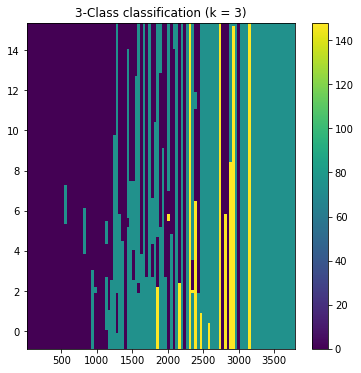

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(111)

CS = ax.pcolormesh(xx, yy, Z)

#ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')

#cbar_ax = fig.add_axes([0.95, 0.13, 0.03, 0.76])
cc = fig.colorbar(im)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier